In [1]:
from google.colab import files
import os, zipfile

# 1. kaggle.json dosyasını yükle
print("Lütfen kaggle.json dosyanı yükle:")
uploaded = files.upload()

# 2. Kaggle API ayarları
os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "wb") as f:
    f.write(uploaded["kaggle.json"])
os.chmod("/root/.kaggle/kaggle.json", 600)

# 3. Dataset'i indir (senin verdiğin path)
!kaggle datasets download -d hamdallak/the-iqothnccd-lung-cancer-dataset

# 4. Zip dosyasını çıkar
with zipfile.ZipFile("the-iqothnccd-lung-cancer-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("lung_dataset")

# 5. Dosyaları listele
print("Veri başarıyla indirildi ve çıkarıldı:")
!ls lung_dataset


Lütfen kaggle.json dosyanı yükle:


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/hamdallak/the-iqothnccd-lung-cancer-dataset
License(s): CC0-1.0
Veri başarıyla indirildi ve çıkarıldı:
'The IQ-OTHNCCD lung cancer dataset'


In [3]:
from PIL import Image

# Görsel işlemede kullanılacak sabitler
img_width, img_height = 150, 150

# Tekrar çalıştırılacak fonksiyon
def load_images_from_folder(directory, class_index, limit=100):
    images, labels = [], []
    filenames = sorted(os.listdir(directory))
    if limit: filenames = filenames[:limit]
    for filename in filenames:
        img = Image.open(os.path.join(directory, filename)).resize((img_width, img_height)).convert("RGB")
        img = np.array(img)
        if len(img.shape) == 2:
            img = np.stack([img] * 3, axis=-1)
        img = img.astype(np.float32) / 255.0
        images.append(img.flatten())
        labels.append(class_index)
    return images, labels

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


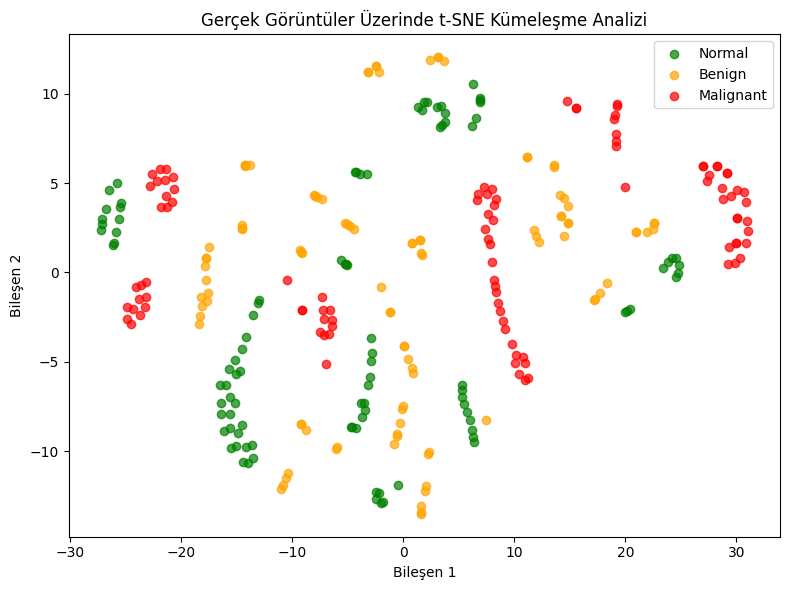

'/mnt/data/tsne_real_cluster.png'

In [6]:
# DÜZELTİLMİŞ BASE PATH
from sklearn.manifold import TSNE

base_path = "/content/lung_dataset/The IQ-OTHNCCD lung cancer dataset"

# Sınıf klasörleri
normal_path = os.path.join(base_path, "Normal cases")
benign_path = os.path.join(base_path, "Bengin cases")
malignant_path = os.path.join(base_path, "Malignant cases")

# Tekrar veri oku
normal_imgs, normal_labels = load_images_from_folder(normal_path, 0)
benign_imgs, benign_labels = load_images_from_folder(benign_path, 1)
malignant_imgs, malignant_labels = load_images_from_folder(malignant_path, 2)

# Birleştir
X_real = np.array(normal_imgs + benign_imgs + malignant_imgs)
y_real = np.array(normal_labels + benign_labels + malignant_labels)

# Boyut indirgeme (t-SNE)
tsne_real = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
X_tsne = tsne_real.fit_transform(X_real)

# Görselleştir
plt.figure(figsize=(8, 6))
colors = ['green', 'orange', 'red']
labels = ['Normal', 'Benign', 'Malignant']

for class_idx in range(3):
    plt.scatter(X_tsne[y_real == class_idx, 0], X_tsne[y_real == class_idx, 1],
                c=colors[class_idx], label=labels[class_idx], alpha=0.7)

plt.legend()
plt.title("Gerçek Görüntüler Üzerinde t-SNE Kümeleşme Analizi")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.tight_layout()
tsne_output_path = "/mnt/data/tsne_real_cluster.png"

plt.show()

tsne_output_path


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
import os
import imghdr
import random
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np
import numpy as np
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
from PIL import Image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt




<ipython-input-5-85202fa5e6b6>:7: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
dataset_path = Path("/content/lung_dataset/The IQ-OTHNCCD lung cancer dataset")

image_size = (128, 128)
batch_size = 32
seed = 123

normalization_layer = Rescaling(1./127.5, offset=-1)
def preprocess_image(image, label):
    image = tf.cast(image, tf.float32)
    image = normalization_layer(image)
    return image, label

raw_train_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size
)
raw_val_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size
)

class_names = raw_train_dataset.class_names
print("Sınıf İsimleri:", class_names)

train_dataset = (
    raw_train_dataset
    .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    .shuffle(1000)
    .cache()
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

val_dataset = (
    raw_val_dataset
    .map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    .cache()
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

label_to_index = {name: i for i, name in enumerate(class_names)}
print("Etiket eşleşmeleri:", label_to_index)


def filter_by_class(dataset, class_index):
    return dataset.filter(lambda img, label: tf.reduce_any(tf.equal(label, class_index)))

train_dataset_benign = filter_by_class(train_dataset, label_to_index["Bengin cases"])
train_dataset_malignant = filter_by_class(train_dataset, label_to_index["Malignant cases"])
train_dataset_normal = filter_by_class(train_dataset, label_to_index["Normal cases"])


Found 1097 files belonging to 3 classes.
Using 878 files for training.
Found 1097 files belonging to 3 classes.
Using 219 files for validation.
Sınıf İsimleri: ['Bengin cases', 'Malignant cases', 'Normal cases']
Etiket eşleşmeleri: {'Bengin cases': 0, 'Malignant cases': 1, 'Normal cases': 2}


In [14]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Modelleri yükle
generator = load_model("gan_benign_generator.h5")
discriminator = load_model("gan_benign_discriminator.h5")

latent_dim = generator.input_shape[1]
output_dir = "generated_images_benign"
os.makedirs(output_dir, exist_ok=True)

# Hedef görüntü sayısı
target_count = 130
generated = 0
attempts = 0
max_attempts = 20000  # güvenli limit

# Eşik değeri
confidence_threshold = 0.98

print(f"[INFO] Discriminator tabanlı filtreleme başlatıldı...")

while generated < target_count and attempts < max_attempts:
    z = np.random.normal(0, 1, (1, latent_dim))
    fake_img = generator.predict(z, verbose=0)

    # Discriminator skoru hesapla
    score = discriminator.predict(fake_img, verbose=0)[0][0]

    if score >= confidence_threshold:
        img = np.clip(fake_img[0], 0, 1)
        img_uint8 = (img * 255).astype(np.uint8)

        if img_uint8.shape[-1] == 1:
            img_uint8 = img_uint8.squeeze(-1)

        Image.fromarray(img_uint8).save(f"{output_dir}/image_{generated+1:03d}.png")
        generated += 1

    attempts += 1

print(f"[DONE] {generated} görüntü üretildi ({attempts} denemede).")


[INFO] Discriminator tabanlı filtreleme başlatıldı...
[DONE] 130 görüntü üretildi (186 denemede).


In [15]:
img_width, img_height = 150, 150
real_data_path = "/content/lung_dataset/The IQ-OTHNCCD lung cancer dataset"
gan_data_path = "/content"

# Yükleme fonksiyonu (limit varsa sınırlı alır)
def load_images_from_directory(directory, class_index, limit=None):
    images, labels = [], []
    filenames = os.listdir(directory)
    if limit: filenames = filenames[:limit]
    for filename in filenames:
        img = Image.open(os.path.join(directory, filename)).resize((img_width, img_height)).convert("RGB")
        img = np.array(img)
        if len(img.shape) == 2:
            img = np.stack([img]*3, axis=-1)
        images.append(img)
        labels.append(class_index)
    return images, labels


In [16]:
# Verileri yükle (etiket dönüşümü burada yapılır)
normal_images, normal_labels = load_images_from_directory(os.path.join(real_data_path, "Normal cases"), 0)
benign_images, benign_labels = load_images_from_directory(os.path.join(real_data_path, "Bengin cases"), 1)
malignant_images, malignant_labels = load_images_from_directory(os.path.join(real_data_path, "Malignant cases"), 1)

# GAN verileri (yalnız benign ve normal var)
generated_images_normal, _ = load_images_from_directory(os.path.join(gan_data_path, "generated_images_normal"), 0)
generated_images_benign, _ = load_images_from_directory(os.path.join(gan_data_path, "generated_images_benign"), 1)


In [17]:
print("Normal toplam:", len(normal_images))
print("Benign toplam:", len(benign_images))
print("Malignant toplam:", len(malignant_images))

print("GAN normal:", len(generated_images_normal))
print("GAN benign:", len(generated_images_benign))


Normal toplam: 416
Benign toplam: 120
Malignant toplam: 561
GAN normal: 450
GAN benign: 130


In [18]:
from sklearn.model_selection import train_test_split

def split_dataset(images, labels, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2):
    X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=(1-train_ratio), random_state=42, stratify=labels)
    val_size = test_ratio / (val_ratio + test_ratio)  # val+test üzerinden test oranı
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_size, random_state=42, stratify=y_temp)
    return X_train, y_train, X_val, y_val, X_test, y_test

# 1. Etiketleri numpy olarak hazırla
normal_labels = np.array([0] * len(normal_images))
benign_labels = np.array([1] * len(benign_images))
malignant_labels = np.array([1] * len(malignant_images))  # Benign + Malignant = Cancerous (1)

# 2. Her sınıfı ayrı ayrı ayır
Xn_train, yn_train, Xn_val, yn_val, Xn_test, yn_test = split_dataset(np.array(normal_images), normal_labels)
Xb_train, yb_train, Xb_val, yb_val, Xb_test, yb_test = split_dataset(np.array(benign_images), benign_labels)
Xm_train, ym_train, Xm_val, ym_val, Xm_test, ym_test = split_dataset(np.array(malignant_images), malignant_labels)

# 3. Tüm verileri birleştir
X_train_real = np.concatenate([Xn_train, Xb_train, Xm_train]) / 255.0
y_train_real = np.concatenate([yn_train, yb_train, ym_train])

X_val = np.concatenate([Xn_val, Xb_val, Xm_val]) / 255.0
y_val = np.concatenate([yn_val, yb_val, ym_val])

X_test = np.concatenate([Xn_test, Xb_test, Xm_test]) / 255.0
y_test = np.concatenate([yn_test, yb_test, ym_test])

# 4. GAN verisi (yalnızca eğitimde kullanılacak)
X_gan = np.array(generated_images_normal + generated_images_benign) / 255.0
y_gan = np.array([0] * len(generated_images_normal) + [1] * len(generated_images_benign))

print("Eğitim seti:", X_train_real.shape)
print("Validation seti:", X_val.shape)
print("Test seti:", X_test.shape)
print("GAN seti:", X_gan.shape)


Eğitim seti: (657, 150, 150, 3)
Validation seti: (219, 150, 150, 3)
Test seti: (221, 150, 150, 3)
GAN seti: (580, 150, 150, 3)


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, ReLU
from tensorflow.keras.optimizers import Adam

def build_model():
    model = Sequential([
        Conv2D(64, (3, 3), padding='same', input_shape=(150, 150, 3)),
        BatchNormalization(), ReLU(), MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), padding='same'), BatchNormalization(), ReLU(), MaxPooling2D(2, 2),
        Conv2D(256, (3, 3), padding='same'), BatchNormalization(), ReLU(), MaxPooling2D(2, 2),
        Conv2D(512, (3, 3), padding='same'), BatchNormalization(), ReLU(), MaxPooling2D(2, 2),
        GlobalAveragePooling2D(), Dense(512, activation='relu'), Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def find_best_threshold(y_true, y_probs):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    f1_scores = 2 * (tpr * (1 - fpr)) / (tpr + (1 - fpr) + 1e-8)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx]

def run_repeated_training(X_train_base, y_train_base, X_gan, y_gan, X_test, y_test, n_runs=10):
    results_real = []
    results_gan = []

    best_f1_real = -1
    best_f1_gan = -1
    best_model_real = None
    best_model_gan = None
    best_threshold_real = 0.5
    best_threshold_gan = 0.5

    for run in tqdm(range(n_runs), desc="Modeller çalıştırılıyor"):
        X_base, y_base = shuffle(X_train_base, y_train_base, random_state=run)
        X_train, X_val, y_train, y_val = train_test_split(X_base, y_base, test_size=0.25, random_state=run)

        model_real = build_model()
        model_real.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=0)
        probs_real = model_real.predict(X_test).flatten()
        threshold_real = find_best_threshold(y_test, probs_real)
        y_pred_real = (probs_real >= threshold_real).astype(int)

        acc_real = accuracy_score(y_test, y_pred_real)
        prec_real = precision_score(y_test, y_pred_real)
        rec_real = recall_score(y_test, y_pred_real)
        f1_real = f1_score(y_test, y_pred_real)
        results_real.append([acc_real, prec_real, rec_real, f1_real])

        if f1_real > best_f1_real:
            best_f1_real = f1_real
            best_model_real = model_real
            best_threshold_real = threshold_real

        X_train_gan = np.concatenate([X_train, X_gan], axis=0)
        y_train_gan = np.concatenate([y_train, y_gan], axis=0)
        model_gan = build_model()
        model_gan.fit(X_train_gan, y_train_gan, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=0)
        probs_gan = model_gan.predict(X_test).flatten()
        threshold_gan = find_best_threshold(y_test, probs_gan)
        y_pred_gan = (probs_gan >= threshold_gan).astype(int)

        acc_gan = accuracy_score(y_test, y_pred_gan)
        prec_gan = precision_score(y_test, y_pred_gan)
        rec_gan = recall_score(y_test, y_pred_gan)
        f1_gan = f1_score(y_test, y_pred_gan)
        results_gan.append([acc_gan, prec_gan, rec_gan, f1_gan])

        if f1_gan > best_f1_gan:
            best_f1_gan = f1_gan
            best_model_gan = model_gan
            best_threshold_gan = threshold_gan

    if best_model_real:
        best_model_real.save("normal_model_best.h5")
        with open("normal_threshold.txt", "w") as f:
            f.write(str(best_threshold_real))

    if best_model_gan:
        best_model_gan.save("gan_model_best.h5")
        with open("gan_threshold.txt", "w") as f:
            f.write(str(best_threshold_gan))

    return np.array(results_real), np.array(results_gan)

real_metrics, gan_metrics = run_repeated_training(
    X_train_real, y_train_real, X_gan, y_gan, X_test, y_test, n_runs=10
)

def print_summary(name, metrics):
    print(f"\n {name} - Ortalamalar ve Standart Sapma:")
    print(f"Accuracy :  {metrics[:,0].mean():.4f} ± {metrics[:,0].std():.4f}")
    print(f"Precision:  {metrics[:,1].mean():.4f} ± {metrics[:,1].std():.4f}")
    print(f"Recall   :  {metrics[:,2].mean():.4f} ± {metrics[:,2].std():.4f}")
    print(f"F1 Score :  {metrics[:,3].mean():.4f} ± {metrics[:,3].std():.4f}")

print_summary("Normal CNN", real_metrics)
print_summary("GAN Destekli CNN", gan_metrics)


Modeller çalıştırılıyor:   0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 480ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step


Modeller çalıştırılıyor:  10%|█         | 1/10 [01:06<09:55, 66.18s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step


Modeller çalıştırılıyor:  20%|██        | 2/10 [01:56<07:32, 56.59s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


Modeller çalıştırılıyor:  30%|███       | 3/10 [02:46<06:15, 53.69s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step


Modeller çalıştırılıyor:  40%|████      | 4/10 [03:35<05:11, 51.94s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step


Modeller çalıştırılıyor:  50%|█████     | 5/10 [04:24<04:14, 50.91s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step


Modeller çalıştırılıyor:  60%|██████    | 6/10 [05:13<03:21, 50.31s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


Modeller çalıştırılıyor:  70%|███████   | 7/10 [06:02<02:29, 49.72s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step


Modeller çalıştırılıyor:  80%|████████  | 8/10 [06:51<01:38, 49.42s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step


Modeller çalıştırılıyor:  90%|█████████ | 9/10 [07:38<00:48, 48.93s/it]/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step


Modeller çalıştırılıyor: 100%|██████████| 10/10 [08:28<00:00, 50.89s/it]



 Normal CNN - Ortalamalar ve Standart Sapma:
Accuracy :  0.6244 ± 0.0446
Precision:  0.7359 ± 0.0409
Recall   :  0.6161 ± 0.0607
F1 Score :  0.6692 ± 0.0465

 GAN Destekli CNN - Ortalamalar ve Standart Sapma:
Accuracy :  0.6986 ± 0.0650
Precision:  0.7978 ± 0.0627
Recall   :  0.6920 ± 0.0859
F1 Score :  0.7382 ± 0.0621


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step


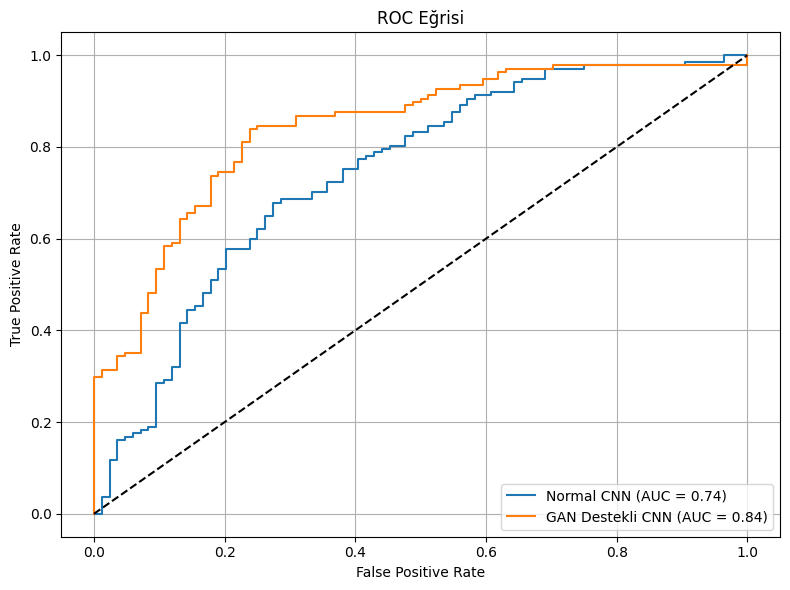

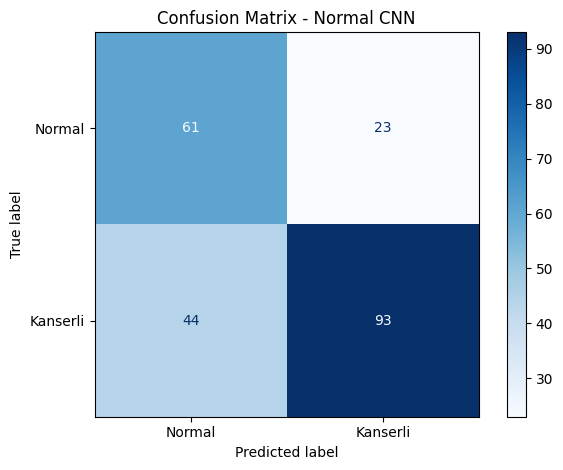

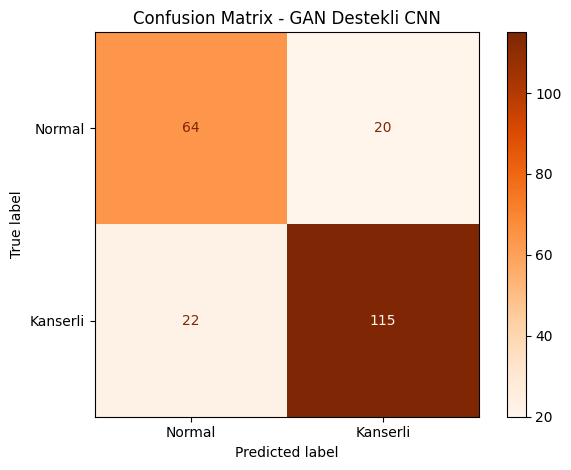

Classification Report - Normal CNN
              precision    recall  f1-score   support

      Normal       0.58      0.73      0.65        84
    Kanserli       0.80      0.68      0.74       137

    accuracy                           0.70       221
   macro avg       0.69      0.70      0.69       221
weighted avg       0.72      0.70      0.70       221


Classification Report - GAN Destekli CNN
              precision    recall  f1-score   support

      Normal       0.74      0.76      0.75        84
    Kanserli       0.85      0.84      0.85       137

    accuracy                           0.81       221
   macro avg       0.80      0.80      0.80       221
weighted avg       0.81      0.81      0.81       221



In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import load_model

# Modelleri yükle
normal_model = load_model("normal_model_best.h5")
gan_model = load_model("gan_model_best.h5")

# Eşik değerlerini oku
with open("normal_threshold.txt", "r") as f:
    normal_thresh = float(f.read())
with open("gan_threshold.txt", "r") as f:
    gan_thresh = float(f.read())

# Tahminler
y_probs_normal = normal_model.predict(X_test).ravel()
y_probs_gan = gan_model.predict(X_test).ravel()

y_pred_normal = (y_probs_normal >= normal_thresh).astype(int)
y_pred_gan = (y_probs_gan >= gan_thresh).astype(int)

# ROC
fpr_normal, tpr_normal, _ = roc_curve(y_test, y_probs_normal)
fpr_gan, tpr_gan, _ = roc_curve(y_test, y_probs_gan)
auc_normal = auc(fpr_normal, tpr_normal)
auc_gan = auc(fpr_gan, tpr_gan)

plt.figure(figsize=(8, 6))
plt.plot(fpr_normal, tpr_normal, label=f'Normal CNN (AUC = {auc_normal:.2f})')
plt.plot(fpr_gan, tpr_gan, label=f'GAN Destekli CNN (AUC = {auc_gan:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig("roc_best_models.png", dpi=300)
plt.show()

# Confusion Matrix
cm_normal = confusion_matrix(y_test, y_pred_normal)
cm_gan = confusion_matrix(y_test, y_pred_gan)

disp1 = ConfusionMatrixDisplay(cm_normal, display_labels=["Normal", "Kanserli"])
disp1.plot(cmap="Blues")
plt.title("Confusion Matrix - Normal CNN")
plt.tight_layout()
plt.savefig("cm_normal.png", dpi=300)
plt.show()

disp2 = ConfusionMatrixDisplay(cm_gan, display_labels=["Normal", "Kanserli"])
disp2.plot(cmap="Oranges")
plt.title("Confusion Matrix - GAN Destekli CNN")
plt.tight_layout()
plt.savefig("cm_gan.png", dpi=300)
plt.show()

# Classification Report
print("Classification Report - Normal CNN")
print(classification_report(y_test, y_pred_normal, target_names=["Normal", "Kanserli"]))
print("\nClassification Report - GAN Destekli CNN")
print(classification_report(y_test, y_pred_gan, target_names=["Normal", "Kanserli"]))
